#           INTERNET SERVICE CHURN 

## OBJECTIVE:
1. Identify the profile of customers that are likely to churn with available features.
2. Build models that predict probability of whether customers will churn or not.

## Context of Analysis
           
 There is a big competition between Internet providers. If a providers want to increase its revenue they needs more subscriber but keep existing customer is more important than having new ones. So, providers want to know which customer should cancel his service. If the provider cancel the service, that is called churn. 

 All industries suffer from voluntary churn -- the loss of customers to some other company. The survival of any business is based on its ability to retain customers. This is particularly true for phone, cable TV, satellite TV and wireless companies. How do you reduce churn? There are many ways: better products, better delivery methods, lower prices, building satisfactory customer relationships, better marketing and, above all, successful customer communications. 
 
 Wireless companies today measure voluntary churn by a monthly figure, such as 1.9 percent or 2.1 percent. This is the average number of customers who quit their service per month. Annual churn rates for telecommunications companies average between 10 percent and 67 percent.
 
 Industry retention surveys have shown that while price and product are important, most people leave any service because of dissatisfaction with the way they are treated. They would not be looking around if they were happy with their current provider, its service and employees. 
 
 Churn reduction in the telecom industry is a serious problem, but there are many things that can be done to reduce it, and, with a customer database, many ways of measuring your success.


##  Introduction to data

The dataset consist of the following features:
1) is_tv_subscriber customer - has a tv subscription ?

2) is_movie_package_subscriber?

3) subscription_age - how many year has the customer use our service

4) bill_avg - last 3 months bill avg

5) reamining_contract - how many year remaining for customer contract. If null; customer didn't have a contract. the customer                           who has a contract time have to use their service until contract end.if they canceled their service                             before contract time end they pay a penalty fare.

Two ways in which a customer could be using the services. One through a time-bound contract which costs less and another through a normal monthly subscription which obviously costs more. So, even if a person is not in a contract, he's still a user who's paying monthly fees.

5) service_failure_count customer - call count to call center for service failure for last 3 months

6) download_avg - last 3 months internet usage (GB)

7) upload_avg last - 3 months upload avg (GB)

8) download_over_limit - most of customer has a download limit. if they reach this limit they have to pay for this. this column                          contain "limit over count" for last 9 months

9) churn - this is the target column. if 1 customer canceled his service

The dataset is taken from https://www.kaggle.com/mehmetsabrikunt/internet-service-churn/metadata

Consist of 72275 rows and 11 columns.

## Import Libraries

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt

##  Import Dataset

In [2]:
isc = pd.read_csv("internet_service_churn.csv")

## Data Cleaning

In [3]:
isc.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [4]:
isc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [5]:
isc.head(5)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


## Null Values

In [6]:
isc.isna().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

##### The remaining_contract has blank values of 21,572 which means the customers never opted for contract. The blank values can be filled with 0. 
###### Also, create a new column called is_contract which shows whether the customer opted for contract or not. 
###### download_avg & upload_avg has 381 blank values which can be dropped for better results.

In [7]:
test_cols = isc.columns.tolist()
test_cols.insert(5, 'is_contract')

# Creating is_contract column
isc['is_contract'] = isc['reamining_contract'].apply(lambda x: 0 if pd.isna(x) else 1)
# Imputing null values with 0
isc['reamining_contract'].replace(np.nan, 0, inplace=True)
# Rearranging columns
test_prepared = isc[test_cols]
column_names = ['id','is_tv_subscriber','is_movie_package_subscriber','subscription_age','bill_avg','reamining_contract',
                'is_contract','service_failure_count','download_avg','upload_avg','download_over_limit','churn']

isc = isc.reindex(columns=column_names)

In [8]:
isc.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,is_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,1,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,1,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,0,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0,0.0,0.0,0,1


In [9]:
isc['download_avg'].replace('', np.nan, inplace=True)
isc['upload_avg'].replace('',np.nan, inplace=True)
isc.dropna(subset=['download_avg'], inplace=True)
isc.dropna(subset=['upload_avg'], inplace=True)

In [10]:
isc.isna().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
is_contract                    0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [11]:
isc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  int64  
 5   reamining_contract           71893 non-null  float64
 6   is_contract                  71893 non-null  int64  
 7   service_failure_count        71893 non-null  int64  
 8   download_avg                 71893 non-null  float64
 9   upload_avg                   71893 non-null  float64
 10  download_over_limit          71893 non-null  int64  
 11  churn                        71893 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 7.1 MB


###### Now, the data in all of the columns has non-null values & is ready for data exploration.
###### Dataset now consist of 71893 rows & 12 columns.

## Exploratory Data Analysis

### Churn Rate

<AxesSubplot:title={'center':"Count of customers who has churned & didn't churn"}, xlabel='churn', ylabel='count'>

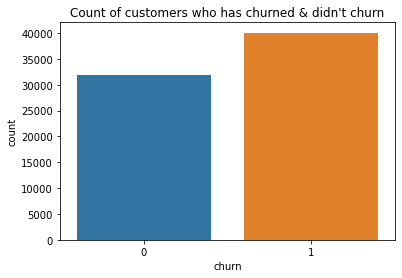

In [12]:
plt.title("Count of customers who has churned & didn't churn")
sn.countplot(x = 'churn' ,  data = isc)

In [13]:
isc['churn'].value_counts()

1    40050
0    31843
Name: churn, dtype: int64

###### The count of people who have already churned is more. There is imbalance in the data with 40050 who has churned & 31843 who has not churned.

In [14]:
sub = isc[["is_tv_subscriber","is_movie_package_subscriber"]].sum()
sub

is_tv_subscriber               58609
is_movie_package_subscriber    24017
dtype: int64

In [15]:
isc.groupby('is_tv_subscriber')['is_movie_package_subscriber'].value_counts()

is_tv_subscriber  is_movie_package_subscriber
0                 0                              13282
                  1                                  2
1                 0                              34594
                  1                              24015
Name: is_movie_package_subscriber, dtype: int64

###### Customers with tv subscription are more compared to movie package subscribers. 
###### We can see only 2 customers opted for movie only package otherwise people who opted for movie package also has tv subscription. 
###### Customers who didn't opted for both tv & movie subscription include 13282. Customers who opted for both tv & movie include 24015.

## Is Tv subscribers causing churn?

[Text(0.5, 0, 'Tv subscriber or not')]

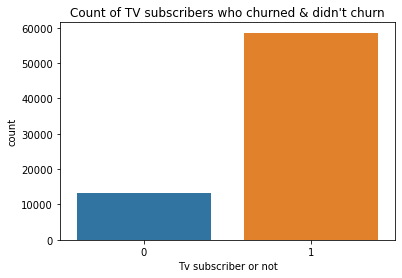

In [16]:
plt.title("Count of TV subscribers who churned & didn't churn")
ax = sn.countplot(x = 'is_tv_subscriber' ,  data = isc)
ax.set(xlabel='Tv subscriber or not')

###### The customers who has subscribed to TV are the ones who has churned more. So, is_tv_subscriber is a important factor in prediction.

## Is movie subscribers causing churn?

[Text(0.5, 0, 'Movie subscriber or not')]

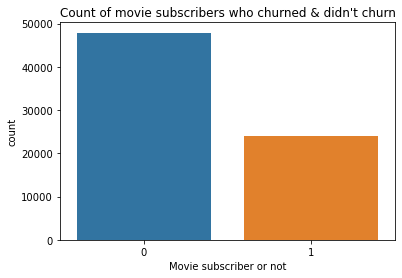

In [17]:
plt.title("Count of movie subscribers who churned & didn't churn")
ax = sn.countplot(x = 'is_movie_package_subscriber' ,  data = isc)
ax.set(xlabel='Movie subscriber or not')

###### Movie package subscribers has lower churn rate & also customers who has opted for movie package are low. So, is_movie_package_subscriber cannot be considered an important factor in prediction.

In [18]:
isc.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['churn']].agg(['sum'])

churn
                                                sum
is_tv_subscriber is_movie_package_subscriber       
0                0                            11964
                 1                                2
1                0                            19891
                 1                             8193

###### We can see that customers who have opted for both tv & movie subscription have less churn rate. 
###### Customers who do not have subscriptions & also customers with tv subscription only has higher churn rate.

## Do customers churn less with higher subscription years?

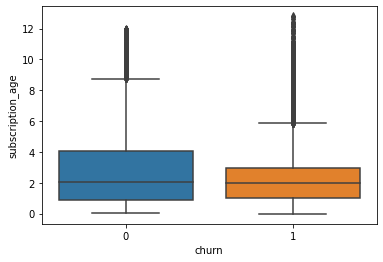

In [19]:
sn.boxplot(x="churn",y="subscription_age",data=isc)
plt.show() 

###### We can see that the most of the customers who has not churned has subscription age lies between 1 to 4 years & there are some higher subscription age who has not churned. 
###### But for the customers who has churned subscription age lies between 1.5 to 3 years & there are exceptions with customers having high subscription age causing churn. Mostly, customers try to leave the service before 3 years.

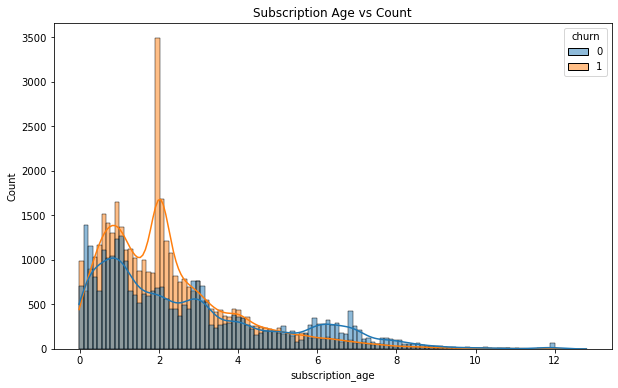

In [20]:
plt.figure(figsize = (10,6))
sn.histplot(data = isc, x= 'subscription_age', kde = True, hue = 'churn')
plt.title('Subscription Age vs Count')
plt.show()

###### Subscription age mostly lies in 0 to 4 years & customers with high subscription age are less. The churn rate is also higher in the 0 to 4 years subscription age. So, subscription_age is a important factor in churn prediction. 

## Is the customers bill average caused effect on churn rate? 

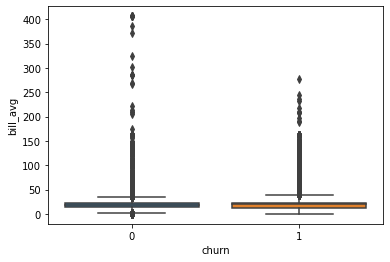

In [21]:
sn.boxplot(x="churn",y="bill_avg",data=isc)
plt.show() 

###### Bill average most of it's values lies in between 10 to 40 dollars for customers who churn and who do not churn. There are exceptions with higher bill average customers being non - churner & also higher bill average customers being churners.

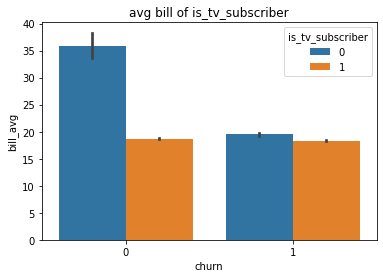

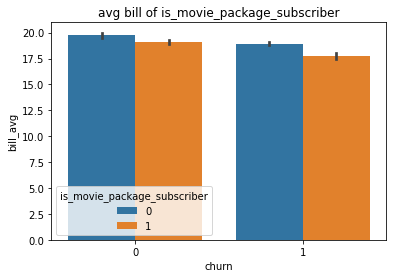

In [22]:
subscribers=["is_tv_subscriber","is_movie_package_subscriber"]
for i in subscribers:
    sn.barplot(x="churn",y="bill_avg",data=isc,hue=i)
    plt.title("avg bill of "+ i)
    plt.show()

In [23]:
isc.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['bill_avg','churn']].agg(['sum'])

bill_avg  churn
                                                  sum    sum
is_tv_subscriber is_movie_package_subscriber                
0                0                             280632  11964
                 1                                 28      2
1                0                             639313  19891
                 1                             447205   8193

###### The customers who didn't have any subscription has lower average bill but still had a good amount of churn.
###### The cusomers who only has tv subscription has higher average bill with highest churn rate.
###### Customers with both subscription has the lowest churn rate.


###### Thus, Bill average overall can be considered a factor which can cause the customer to churn

## Is remaining contract effects churn rate?

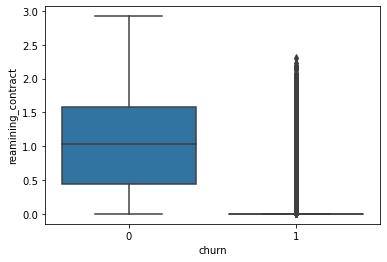

In [24]:
sn.boxplot(x="churn",y="reamining_contract",data=isc)
plt.show() 

###### We find that customers who have no contract are the ones who churn because if they cancel while in contract they have to pay penalty. There are exceptions with customers who had contract but still churned.
###### Thus, remaining contract is a important factor in churn prediction.

## Does contract selection cause churn? 

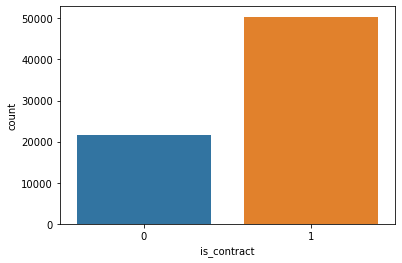

In [25]:
sn.countplot(x="is_contract",data=isc)
plt.show() 

In [26]:
isc.groupby(['is_contract'])[['churn']].agg(['count'])

,churn
,count
is_contract,
0,21518
1,50375


###### Customers opted for contract are more compared to non - contract. Churn is higher for people who do have contract's. This can be related to customers whose contracts are about to end or ended opting to churn.

## Do customers having service failure causing churn?

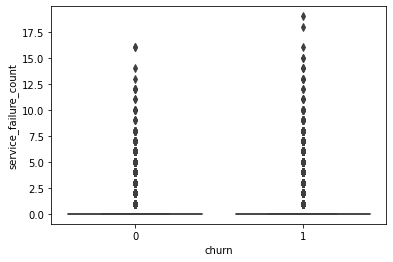

In [27]:
sn.boxplot(x="churn",y="service_failure_count",data=isc)
plt.show() 

###### Customers with higher service failure calls have churned but we can also see the customer who also have high service failure calls has no churn. 
###### But overall if service failure counts do go high it can lead the customer to quit the service.

## Is download average of customers causing churn?

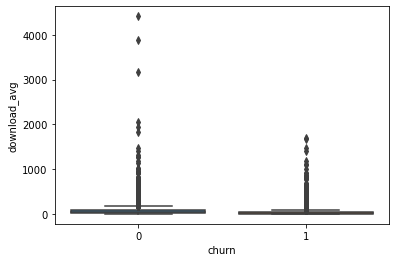

In [28]:
sn.boxplot(x="churn",y="download_avg",data=isc)
plt.show() 

###### The download_average doesn't seem to be a factor in churn prediction.

## Is upload average of customers causing churn?

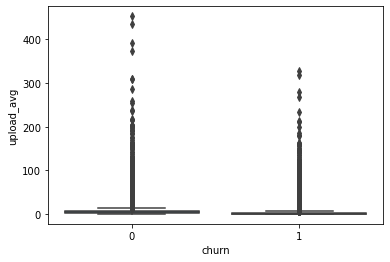

In [29]:
sn.boxplot(x="churn",y="upload_avg",data=isc)
plt.show() 

###### The upload_average doesn't seem to be a factor in churn prediction.

In [30]:
isc.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['download_avg','upload_avg','churn']].agg(['sum'])

download_avg upload_avg  churn
                                                      sum        sum    sum
is_tv_subscriber is_movie_package_subscriber                               
0                0                               347380.1    37656.9  11964
                 1                                   83.2        5.7      2
1                0                              1399045.1   131995.1  19891
                 1                              1394490.4   131723.2   8193

###### The data shows the customers with tv subscription & both tv and movie subscription has the highest data usage.

## Is customers doing download over limit leading to churn?

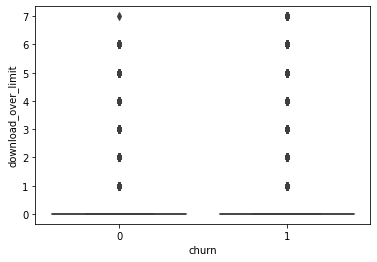

In [31]:
sn.boxplot(x="churn",y="download_over_limit",data=isc)
plt.show() 

###### In reality, customers will be real careful about download over limit & also receive warnings if they reach the limit. 
###### Also, in the graph we cannot see relation between download over limit & churn.

In [32]:
correlation = isc.corr()

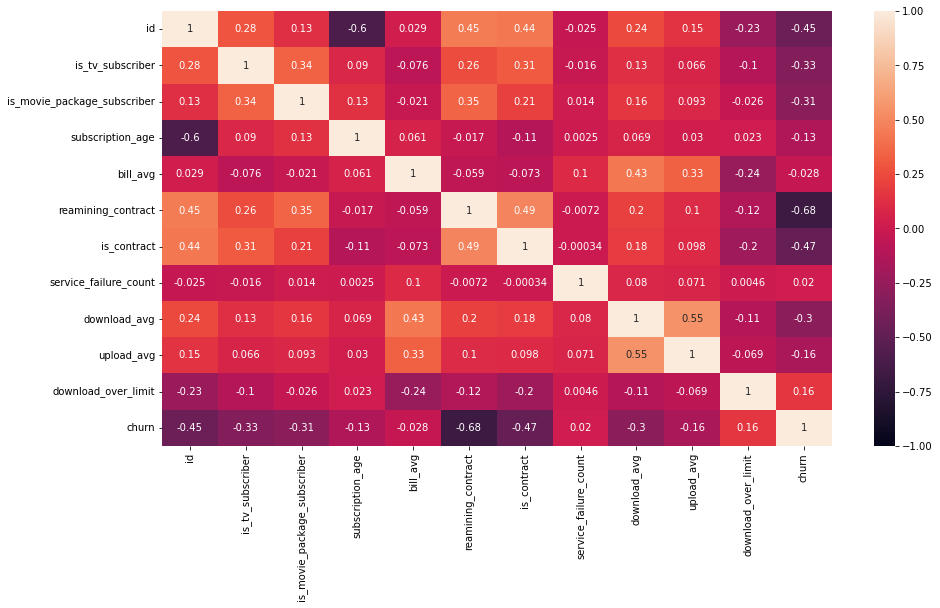

In [33]:
plt.figure(figsize=(15,8))

sn.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.show()

###### We can see from the heatmap service_failure_count & download_over_limit shows the highest correlation with churn. 

## Logistic Regression Modeling (Without Scaling - using 7 features)

In [34]:
from sklearn.model_selection import train_test_split

x_vars = isc[['is_tv_subscriber','subscription_age','service_failure_count',
         'download_avg','is_contract','bill_avg','reamining_contract']]
y_var  = isc['churn']

xTrain, xValid, yTrain, yValid = train_test_split(x_vars, y_var, train_size=0.6, random_state=2)

In [35]:
from sklearn.linear_model import LogisticRegression
LogitModel = LogisticRegression()

In [36]:
LogitModel.fit(xTrain,yTrain)

from sklearn.metrics import accuracy_score
predictions = LogitModel.predict(xTrain)
accuracy_score(yTrain, predictions)

0.8771299408832735

###### The customer who is going to churn can be predicted with 87.02% accuracy.

In [37]:
predictions2 = LogitModel.predict(xValid)
accuracy_score(yValid, predictions2)

0.8761040406147854

In [38]:
from pprint import pprint as pp
from sklearn.metrics import classification_report
s = classification_report(yValid, predictions2)
pp(s)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.88      0.83      0.86     12756\n'
 '           1       0.87      0.91      0.89     16002\n'
 '\n'
 '    accuracy                           0.88     28758\n'
 '   macro avg       0.88      0.87      0.87     28758\n'
 'weighted avg       0.88      0.88      0.88     28758\n')


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yValid, predictions2)

array([[10579,  2177],
       [ 1386, 14616]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

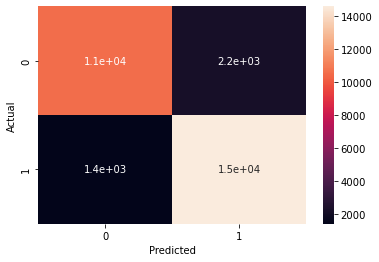

In [40]:
confusion_matrix(yValid, predictions2)
confusion_matrix = pd.crosstab(yValid, predictions2, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

###### Columns are predictions & rows are actual observations. Darker boxes are the ones showing wrong prediction for churn. Lighter boxes shows how many values were corrrectly predicted. 
###### The values in the darker boxes are column are low compared to the lighter boxes thus showing good accuracy.

In [41]:
# Predicting the probability of churn
LogitModel.predict_proba(np.array([[1,10.95,1,2.3,1,2,0.4]]))

array([[0.87205997, 0.12794003]])

###### The predicted probability of customer churning is 23%.

In [42]:
import statsmodels.api as sm
x_inc = isc[['is_tv_subscriber','subscription_age','service_failure_count',
         'download_avg','download_over_limit','reamining_contract','is_contract','bill_avg']]
x_inc = sm.add_constant(x_inc)
y_var = isc['churn']

C:\Users\Abe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
xTrain1, xValid1, yTrain, yValid = train_test_split(x_inc, y_var, train_size=0.6, random_state=2)

In [44]:
Logit_Inc = sm.Logit(yTrain, xTrain1)
results_Inc = Logit_Inc.fit()
print(results_Inc.summary())

Optimization terminated successfully.
         Current function value: 0.332210
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                43135
Model:                          Logit   Df Residuals:                    43126
Method:                           MLE   Df Model:                            8
Date:                Fri, 11 Feb 2022   Pseudo R-squ.:                  0.5161
Time:                        11:21:58   Log-Likelihood:                -14330.
converged:                       True   LL-Null:                       -29613.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.8918      0.077     63.644      0.000       4.741       5.

###### The features which were statiscally unsignificant were removed which include is_movie_package_subscriber & upload_avg.  The statiscally significant features are the ones which can decide which customer will churn.

## Principal Component Analysis

In [45]:
# Separate the Target column in y array and rest of the values of the independent feature in X array.

x = isc.iloc[:,0:11].values 
y = isc.iloc[:,11].values

In [46]:
x

array([[1.500000e+01, 1.000000e+00, 0.000000e+00, ..., 8.400000e+00,
        2.300000e+00, 0.000000e+00],
       [1.800000e+01, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.300000e+01, 1.000000e+00, 0.000000e+00, ..., 1.370000e+01,
        9.000000e-01, 0.000000e+00],
       ...,
       [1.689679e+06, 1.000000e+00, 0.000000e+00, ..., 1.500000e+00,
        2.000000e-01, 0.000000e+00],
       [1.689733e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.689744e+06, 1.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [47]:
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
# Standarization
scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)

In [50]:
x_std

array([[-1.73097508,  0.47608257, -0.70827261, ..., -0.55657473,
        -0.19269873, -0.20878809],
       [-1.73096892, -2.10047599, -0.70827261, ..., -0.68905531,
        -0.42694257, -0.20878809],
       [-1.73095865,  0.47608257, -0.70827261, ..., -0.4729858 ,
        -0.33528194, -0.20878809],
       ...,
       [ 1.73736861,  0.47608257, -0.70827261, ..., -0.66539806,
        -0.40657354, -0.20878809],
       [ 1.73747945, -2.10047599, -0.70827261, ..., -0.68905531,
        -0.42694257, -0.20878809],
       [ 1.73750203,  0.47608257,  1.41188573, ..., -0.68905531,
        -0.42694257, -0.20878809]])

In [51]:
# Covariance Matrix
print('Covariance matrix \n') 
cov_mat= np.cov(x_std, rowvar=False) 
cov_mat

Covariance matrix 



array([[ 1.00001391e+00,  2.83388513e-01,  1.31649437e-01,
        -5.98808536e-01,  2.87240203e-02,  4.47064087e-01,
         4.36734803e-01, -2.46555469e-02,  2.41281526e-01,
         1.45938529e-01, -2.29179163e-01],
       [ 2.83388513e-01,  1.00001391e+00,  3.37048964e-01,
         8.99946592e-02, -7.61986749e-02,  2.57427622e-01,
         3.10066087e-01, -1.60232463e-02,  1.31651860e-01,
         6.57920589e-02, -1.03808503e-01],
       [ 1.31649437e-01,  3.37048964e-01,  1.00001391e+00,
         1.34535932e-01, -2.12309078e-02,  3.45529777e-01,
         2.08609688e-01,  1.38045013e-02,  1.60591763e-01,
         9.32522140e-02, -2.61872661e-02],
       [-5.98808536e-01,  8.99946592e-02,  1.34535932e-01,
         1.00001391e+00,  6.09316265e-02, -1.68467526e-02,
        -1.10485266e-01,  2.52781458e-03,  6.93322577e-02,
         3.02774414e-02,  2.32948858e-02],
       [ 2.87240203e-02, -7.61986749e-02, -2.12309078e-02,
         6.09316265e-02,  1.00001391e+00, -5.94216535e-02,
  

In [52]:
# Eigen vectors, Eigen values
cov_mat = np.cov(x_std.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-4.49818158e-01 -2.30766382e-01 -3.82344951e-01 -7.27178087e-01
   6.76505681e-02 -5.57865810e-02  6.52596968e-02  1.63648434e-01
   1.53128905e-01 -4.83081870e-02 -7.01736940e-02]
 [-3.12868689e-01 -1.50022361e-01  3.47941594e-01  1.95939093e-01
  -5.35207853e-02  4.00201299e-02 -1.16693923e-01  1.55451815e-01
   6.32531759e-01  4.83670300e-01 -2.09448761e-01]
 [-2.77120339e-01 -5.63810177e-02  4.67218692e-01 -2.63168973e-02
   1.23794047e-01 -2.02397529e-02  3.10532105e-02 -2.98519766e-01
   2.87238622e-01 -6.72260480e-01  2.46549118e-01]
 [ 1.33339804e-01  2.75531678e-01  6.51649114e-01 -5.63430209e-01
  -2.09964568e-01  7.87926702e-02  3.69572440e-02  1.25934703e-01
  -2.51666179e-01  1.66991375e-01 -7.39043021e-02]
 [-1.27088801e-01  5.46257674e-01 -1.77290942e-01  2.16262954e-03
  -2.00721550e-01  8.47789943e-02 -3.79484413e-01 -1.64701156e-01
   1.19565099e-01 -2.66536842e-01 -5.91662932e-01]
 [-4.19543773e-01 -1.91438554e-01  1.72529828e-01  2.73853248e-01
   5.

In [53]:
# Eigen vector verification
sq_eig=[] 
for i in eig_vecs: 
    sq_eig.append(i**2) 
    print(sq_eig)
    
a = sum(sq_eig) 
print("sum of squares of each values in an eigen vector is \n", a) 
for ev in eig_vecs: np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

[array([0.20233638, 0.05325312, 0.14618766, 0.52878797, 0.0045766 ,
       0.00311214, 0.00425883, 0.02678081, 0.02344846, 0.00233368,
       0.00492435])]
[array([0.20233638, 0.05325312, 0.14618766, 0.52878797, 0.0045766 ,
       0.00311214, 0.00425883, 0.02678081, 0.02344846, 0.00233368,
       0.00492435]), array([0.09788682, 0.02250671, 0.12106335, 0.03839213, 0.00286447,
       0.00160161, 0.01361747, 0.02416527, 0.40009643, 0.23393696,
       0.04386878])]
[array([0.20233638, 0.05325312, 0.14618766, 0.52878797, 0.0045766 ,
       0.00311214, 0.00425883, 0.02678081, 0.02344846, 0.00233368,
       0.00492435]), array([0.09788682, 0.02250671, 0.12106335, 0.03839213, 0.00286447,
       0.00160161, 0.01361747, 0.02416527, 0.40009643, 0.23393696,
       0.04386878]), array([7.67956822e-02, 3.17881916e-03, 2.18293306e-01, 6.92579084e-04,
       1.53249662e-02, 4.09647597e-04, 9.64301885e-04, 8.91140509e-02,
       8.25060257e-02, 4.51934154e-01, 6.07864675e-02])]
[array([0.20233638, 0.0

In [54]:
#Make a list of (eigenvalue, eigenvector) tuples 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))] 

print(type(eig_pairs)) 
    
#Sort the (eigenvalue, eigenvector) tuples from high to low eig_pairs.sort() 
eig_pairs.reverse() 
print("\n",eig_pairs) 

#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('\n\n\nEigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])

<class 'list'>

 [(0.551846433429104, array([-0.07017369, -0.20944876,  0.24654912, -0.0739043 , -0.59166293,
       -0.18558344, -0.08023226,  0.04336539, -0.10163221,  0.56600444,
       -0.40180146])), (0.6950301304244645, array([-0.04830819,  0.4836703 , -0.67226048,  0.16699137, -0.26653684,
       -0.22699112,  0.31164963,  0.05792731,  0.08166726,  0.22666092,
        0.05307029])), (0.7618078817428381, array([ 0.1531289 ,  0.63253176,  0.28723862, -0.25166618,  0.1195651 ,
       -0.48961167, -0.41423866,  0.00608108, -0.0471594 , -0.03548098,
       -0.03852614])), (0.47374079267148206, array([ 0.16364843,  0.15545182, -0.29851977,  0.1259347 , -0.16470116,
        0.56206575, -0.69325974,  0.04787662,  0.02682056,  0.05372516,
       -0.12053615])), (0.40065800703879745, array([ 0.0652597 , -0.11669392,  0.03105321,  0.03695724, -0.37948441,
       -0.1939669 , -0.07000292,  0.01421759,  0.75140229, -0.46337449,
       -0.11720968])), (0.9636803496868052, array([-5.57865810e-

In [55]:
# Explained Variance
tot = sum(eig_vals) 
print("\n",tot) 
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
print("\n\n1. Variance Explained\n",var_exp) 
cum_var_exp = np.cumsum(var_exp) 
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp) 
print("\n\n3. Percentage of variance the first seven principal components each contain\n ",var_exp[0:7]) 
print("\n\n4. Percentage of variance the first seven principal components together contain\n",sum(var_exp[0:7]))


 11.000153007288505


1. Variance Explained
 [24.256030672161003, 16.42349290933143, 13.334811329855494, 9.205848151881817, 8.760608593792176, 6.925429866639835, 6.318367844192258, 5.016715977163775, 4.306674574049923, 3.642294855110912, 1.8097252258213676]


2. Cumulative Variance Explained
 [ 24.25603067  40.67952358  54.01433491  63.22018306  71.98079166
  78.90622152  85.22458937  90.24130535  94.54797992  98.19027477
 100.        ]


3. Percentage of variance the first seven principal components each contain
  [24.256030672161003, 16.42349290933143, 13.334811329855494, 9.205848151881817, 8.760608593792176, 6.925429866639835, 6.318367844192258]


4. Percentage of variance the first seven principal components together contain
 85.22458936785401


In [56]:
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
print("Eigen values in descending order:")
for i in eig_pairs:
    print(i[0])

Eigen values in descending order:
2.6682004874325407
1.8066093491676354
1.4668496495173475
0.19907254385184786
1.0126573823256408
0.9636803496868052
0.40065800703879745
0.47374079267148206
0.7618078817428381
0.6950301304244645
0.551846433429104


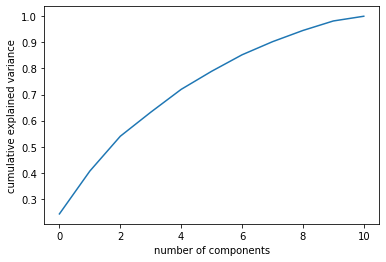

In [57]:
# Scree Plot
from sklearn.decomposition import PCA
pca = PCA().fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

In [58]:
pca = PCA(n_components=7)
x_pca = pca.fit_transform(x_std)
print(pca.explained_variance_ratio_)

[0.24256031 0.16423493 0.13334811 0.09205848 0.08760609 0.0692543
 0.06318368]


In [59]:
.24+.16+.13+.09+.08+.06+0.06


0.8200000000000001

###### ~ 82% of  the variance is explained when we use 6 components. 

In [60]:
principalComponents = pca.fit_transform(x_std) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'
                          , 'principal component 3', 'principal component 4', 'principal component 5'
                           , 'principal component 6','principal component 7'])
principalDf.head(5) # prints the top 5 rows

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,-1.551315,1.482198,-3.406633,-1.820060,0.593149,1.260683,1.657259
1,-3.459533,0.674615,-1.505141,-0.860728,0.052781,1.631882,-0.087720
2,-1.535340,0.708857,-2.520431,-1.398281,0.440881,0.860730,1.610923
3,-3.137261,1.563158,-0.759540,-0.355829,1.119298,1.266442,-0.552584
4,-3.339128,0.425835,-0.916766,-0.671153,-0.018361,1.404652,-0.238495


In [61]:
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['churn'])], axis = 1) 
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,churn
0,-1.551315,1.482198,-3.406633,-1.820060,0.593149,1.260683,1.657259,0
1,-3.459533,0.674615,-1.505141,-0.860728,0.052781,1.631882,-0.087720,1
2,-1.535340,0.708857,-2.520431,-1.398281,0.440881,0.860730,1.610923,1
3,-3.137261,1.563158,-0.759540,-0.355829,1.119298,1.266442,-0.552584,1
4,-3.339128,0.425835,-0.916766,-0.671153,-0.018361,1.404652,-0.238495,1


In [62]:
x_pca.shape

(71893, 7)

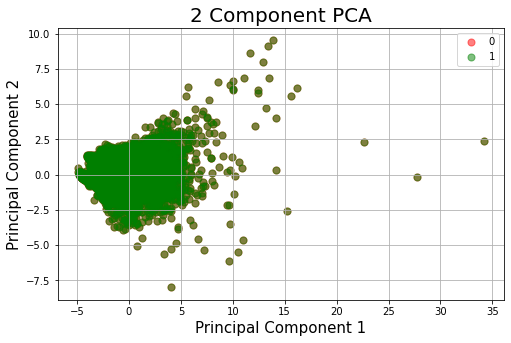

In [63]:
fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = [0,1] 
colors = ['r', 'g'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['churn'] == target  
    ax.scatter(x_pca[:,0],x_pca[:,6], alpha = 0.5
               , c = color , s = 50) 
ax.legend(targets) 
ax.grid()

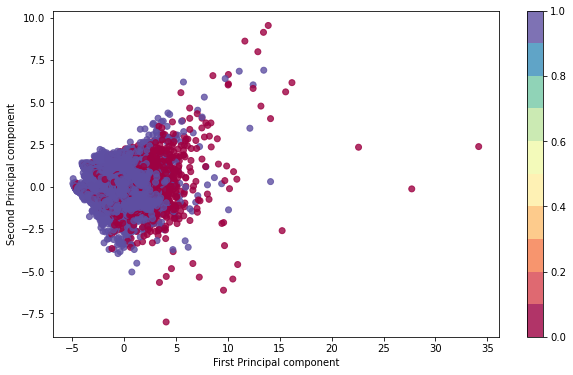

In [64]:
plt.figure(figsize=(10,6))

plt.scatter(x_pca[:,0],x_pca[:,6],c = isc['churn'], alpha=0.8, 
            cmap=plt.cm.get_cmap('Spectral',10))
plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')
plt.colorbar()

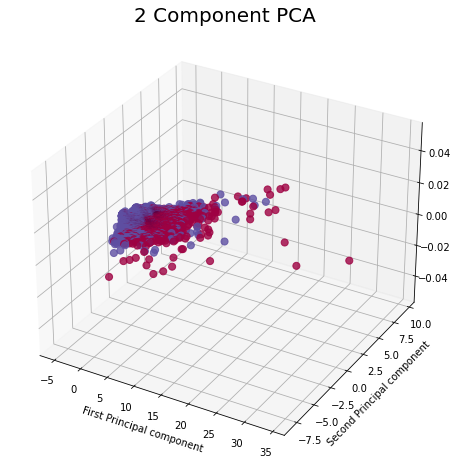

In [65]:
fig = plt.figure(figsize = (10,8)) 
ax = fig.add_subplot(1,1,1,projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 10) 
ax.set_ylabel('Principal Component 2', fontsize = 10) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = [0,1] 
colors = ['r', 'g', 'b'] 
ax.scatter(x_pca[:,0],x_pca[:,6],c = isc['churn'], alpha=0.8, 
            cmap=plt.cm.get_cmap('Spectral',10), s=50)
plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')
plt.show()

###### Together, the first 7 principal components contain 85.15% of the information. The rest 4 principal component contained the rest of the variance of the data set.

## Recommendations:
• Given the insights gained, the company can take some steps to help
reduce churn rate:
1. Conduct interviews and surveys to identify promotions preferred by customers to avoid churn.
2. Offer promotions to customers who do not have contracts (they are most likely to churn).
3. Promote tv & movie subscription (they are less likely to churn).
4. Reduce service failures to avoid customers from churning.
5. Provide discounts to high subscription age customers.

## Logistic Regression Analysis (With Scaling)

# 

In [66]:
# Define the variables
X = isc[['is_tv_subscriber','subscription_age','service_failure_count','download_over_limit','is_movie_package_subscriber',
         'upload_avg','download_avg','is_contract','bill_avg','reamining_contract']]
y  = isc['churn']
y = np.ravel(y)

In [67]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [68]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x, y)


# check the accuracy on the training set
model.score(x, y)

0.878319168764692

In [69]:
# what percentage had churned?
y.mean()

0.5570778796266674

In [70]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,is_tv_subscriber,[-0.598924340989625]
1,subscription_age,[-0.5789995643876633]
2,service_failure_count,[0.12619925549254063]
3,download_over_limit,[0.3622912332460457]
4,is_movie_package_subscriber,[-0.02738460285430502]
5,upload_avg,[0.01349914555442712]
6,download_avg,[-0.6470352217473551]
7,is_contract,[-0.5139608656487309]
8,bill_avg,[-0.08870326163639909]
9,reamining_contract,[-1.8853929588300429]


In [71]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [72]:
# predict class labels for the test set
predicted = model2.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [73]:
# generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[9.99814989e-01, 1.85011429e-04],
       [9.91276736e-01, 8.72326373e-03],
       [1.00000000e+00, 2.70318121e-14],
       ...,
       [9.69049658e-01, 3.09503420e-02],
       [9.94774788e-01, 5.22521229e-03],
       [1.74475387e-01, 8.25524613e-01]])

In [74]:
# generate evaluation metrics
asc = metrics.accuracy_score(y_test, predicted)
roc = metrics.roc_auc_score(y_test, probs[:, 1])
roc

0.7972622964465035

In [75]:
asc

0.4569269287833828

In [76]:
metrics.confusion_matrix(y_test, predicted)

array([[ 9544,     0],
       [11713,   311]], dtype=int64)

In [77]:
pp(metrics.classification_report(y_test, predicted))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.45      1.00      0.62      9544\n'
 '           1       1.00      0.03      0.05     12024\n'
 '\n'
 '    accuracy                           0.46     21568\n'
 '   macro avg       0.72      0.51      0.34     21568\n'
 'weighted avg       0.76      0.46      0.30     21568\n')


In [78]:
# evaluate the model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
x = scaler.fit_transform(X)
scores = cross_val_score(LogisticRegression(), x, y, scoring='accuracy', cv=10)
scores

array([0.91557719, 0.89276773, 0.85173853, 0.94463764, 0.91027959,
       0.69133398, 0.90861038, 0.92474614, 0.88802337, 0.76617054])

In [79]:

model.predict_proba(np.array([[1,11.95,0,0,0,2.3,8.4,1,25,.14]]))

array([[9.99999836e-01, 1.63572991e-07]])